# Умный помощник для специалистов, проводящих социологические исследования

Программа расчитана на помощь специалистам, проводящим социологические исследования. Так же она может применяться в других целях, если для них необходима программная реализация методов анализа данных, рассматриваемых далее.

Код написан на языке Python.

В некоторых местах в коде расставленны комментарии. Они не влияют на выполнение кода. Комментарии обозначены символом **#**. Комментарии могут объяснять устройство кода. Так же в комментариях может помещаться код с пояснениями, который изменяет работу программы. Для того, чтобы сделать код активным, необходимо удалить символ **#** (и, возможно, пробел после него) перед кодом.


Над блоками кода, где новичкам рекомендуется вносить изменения, размещена надпись "**РЕДАКТИРОВАНИЕ КОДА**".

In [93]:
# Подключение необходимых для работы программы библиотек.
# При локальном использовании необходимо установить эти библиотеки.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import *
import scipy as sci
import warnings
import copy
import pathlib


In [94]:
# Отключение предупреждений:
warnings.filterwarnings('ignore')


### Первоначальная настройка

Для работы программы нужно загрузить файл таблицы с данными.

Данные в таблице должны соответствовать ряду правил:

* **Соответствие столбцам**. Статистические данные должны располагаться в столбцах с соответствующими им названиями.

* **Отсутствие пустых строк**. Между строками и столбцами таблицы не должно быть пустых строк и столбцов, т. е. все данные должны находиться в левом верхнем углу таблицы.

* **Одинаковая длина**. Заполненные столбцы должны иметь одинаковую длину.

* **Строка - объект**. В одной строке должна находиться данные только об одном объекте исследования (например, участнику опроа), и наоборот.

Необходимо подключить файл в коде программы. Ниже в коде программы приведён пример этой операции.

*   Если вы работаете с локальным файлом, то вам необходимо загрузить файл в рабочую директорию (папку), и поместить название файла в кавычках вместо значения переменной path, как указанно в примере. Если вы работаете с Google colab, то ваша рабочая директория - "/content/".

*   Если вы подключаете файл через Google Disk, то ваша рабочая директория - "/content/drive/MyDrive/".

**РЕДАКТИРОВАНИЕ КОДА**

In [95]:
# Подключение файла через загрузку в Google Colab :
# path_empiric_data = "/content/<Название файла>.csv"

# Подключение файла из текущей директории:
# path_empiric_data = "./<Название файла>.csv"

# Подключение файла с Google Disk:
# path_empiric_data = "/content/drive/MyDrive/Colab Notebooks/<Название файла>.csv"

# Подключение файла с Google Disk:
path_empiric_data = "/content/drive/MyDrive/Colab Notebooks/Diplom/Diplom_dataset.csv"

# Загрузка данных в программу, и помещение их в переменную df_start
df_start = pd.read_csv(path_empiric_data)


In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Тут и далее в некоторых местах расположены блоки кода, предназначенные для вывода данных о таблице, с которой работает программа, а так же краткой информации о данных в таблице.

В частности, строка


```
print(df_start.info(), end = '\n\n')
```


выводиит краткую информацию о загруженных данных, давая возможность убедиться в том, что была загружена нужная таблица.

Помимо прочего, можно увидеть количество строк в загруженной таблице в строке

```
"RangeIndex: <число строк> entries, <индекс первой строки> to <индекс последней строки>"
```
Ниже можно видеть иноформацию о столбцах в таблице: номер столбца указываются в колонке "#", их назывния в колонке "Column", количество не нулевых значений в столбце в колонке "Non-Null Count". В последнем столбце указан тип данных, т. е. то, в качестве каких значений программа воспринимает данные. В начале работы программы там будет отображаться "object", но при дальнейшей работе программы это изменится.


```
 #   Column                                                              Non-Null Count  Dtype
---  ------                                                              --------------  -----
 0   <Название столбца 1>                                                <n> non-null    object
 1   <Название столбца 2>                                                <n> non-null    object
 ```


Рядом располагаются и другая техническая информация. Так, в самом низу указывается, какой объём памяти занимает таблица.

Для вывода фрагмента саомй таблицы можно использовать целый ряд возможных строк с командами. Пояснения для них приведены в комментариях.

**РЕДАКТИРОВАНИЕ КОДА**

In [97]:
# Вывод общей информации о таблице:
print(df_start.info(), end = '\n\n')

# Вывод первых 5 строк таблицы:
display(df_start.head(5))

# Ввыод последних 5 строк таблицы:
# display(df_start.tail(5))

# Вывод всей таблицы:
# display(df_start)

# Вывод среза таблицы, например, с 10 по 20 строки:
# df_start[10:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype 
---  ------                                                   --------------  ----- 
 0   1. Пол                                                   160 non-null    object
 1   2. Возраст                                               160 non-null    object
 2   3. Образование                                           160 non-null    object
 3   4. Наличие брака                                         160 non-null    object
 4   5. Средний доход за месяц                                160 non-null    object
 5   6. Членство в молодёжной организации                     160 non-null    object
 6   7. Посещение мероприятий культурной направленности       160 non-null    object
 7   8. Посещение мероприятий политической направленности     160 non-null    object
 8   9. Посещение мероприятий развлекательной 

,1. Пол,2. Возраст,3. Образование,4. Наличие брака,5. Средний доход за месяц,6. Членство в молодёжной организации,7. Посещение мероприятий культурной направленности,8. Посещение мероприятий политической направленности,9. Посещение мероприятий развлекательной направленности
0,Мужской,21-23,Среднее общее,Нет,Нет,Нет,Редко,Редко,Редко
1,Мужской,18-20,Среднее общее,Нет,Нет,Да,Часто,Редко,Часто
2,Мужской,27-29,Высшее,Нет,Нет,Нет,Редко,Постоянно,Редко
3,Мужской,33-35,Высшее,Да,32000,Нет,Часто,Постоянно,Редко
4,Мужской,27-29,Высшее,Нет,33000,Нет,Постоянно,Часто,Постоянно


Все изменения будут производиться с копией/копиями исходной таблицы или её фрагментов, чтобы загруженные данные не изменялись. Сделаем копию имеющейся таблицы. Далее она будет храниться в переменной df_data.

In [98]:
df_data = df_start.copy(deep=True)


В ходе работы программы будут создаваться изображения и таблицы с результатами обработки и анализа загруженных данных.

Можно выбрать одно из трёх действий:

* Сохранять файлы на Google Disk, подключив его в настройках Google Colab.

* Сохранять файлы в текущую папку (директорию). Это будет хранилище Google Colab, если работа происходит в нём, или папка на компьютере пользователя, если блокнот запущен локально.

* Не сохранять файлы. Они будут только отображаться в выводе блокнота.

**РЕДАКТИРОВАНИЕ КОДА**

In [99]:
# Сохранение файлов будет производиться в директорию (папку) на Google Disk.
# Необходимо дополнить строку, указав необходимую папку на Doogle Disk.
# files_storage = '/content/drive/MyDrive/<Папка для сохранения>/results/'

# Сохранение файлов будет производиться в текущую директорию (папку):
# files_storage = './results/'

# Для отсутствия сохранения файлов, выберать эту строку:
# files_storage = ''

files_storage = \
'/content/drive/MyDrive/Colab Notebooks/Diplom latest files/results/'


## Обработка данных

### Создание и использование шифра для кодировки данных

Для анализа данных необходимо преобразовать данные из текста в числа путём создания шифра.

Ниже приведён вывод названий всех столбцов для удобства. Это может быть полезно для указания при дальнейшей работе программы названий столбцов, в конце которых может находится пробел (В таком случае он является частью названий столбца, и его необходимо будет указывать внутри кавычек вместе с названием).

In [100]:
print('Вывод всех столбцов таблицы:\n')
for i in df_data.columns:
    print(f'"{i}"')


Вывод всех столбцов таблицы:

"1. Пол"
"2. Возраст"
"3. Образование"
"4. Наличие брака"
"5. Средний доход за месяц"
"6. Членство в молодёжной организации"
"7. Посещение мероприятий культурной направленности"
"8. Посещение мероприятий политической направленности"
"9. Посещение мероприятий развлекательной направленности"


Далее создаются словари, с помощью которых имеющиеся в таблице данные кодируются некоторыми числами.

* В случае, если рассматриваемые данные можно представить на метрической шкале, то рекомендуется использовать или шкалу отношений, или интервальную шкалу с интервалами одинаковой длины.

* В случае, если рассматриваемые данные можно представить на ранговой (порядковой) шкале, то рекомендуется придавать каждому рангу некоторое число. При этом, если числа заменить на шкале изменить, то порядок расположения рангов на шкале сохраняется.

* В случае, если рассмтариваемые данные напрямую не сравниваемы, и используются для классификации объектов с их характеристиками, то используется номиналньая шкала.

Пример создания словарей для двух или более признаков, для которых планируется использовать один шифр, привдеён в комментариях в блоке ниже.

**РЕДАКТИРОВАНИЕ КОДА**

In [101]:
# Пример создания словарей для шифрования данных.
# Тут присваиваются числа 1 и 2 значению некоторого признака:
# dict_1 = {
#     'Первый вариант значения': 1,
#     'Второй вариант значения': 2
# }

# dict_2 = {
#     'Первый вариант значения': 1,
#     'Второй вариант значения': 2,
#     'Третий вариант значения': 3
# }

dict_1 = {
    'Мужской': 1,
    'Женский': 2
}

dict_2 = {
    '18-20': 19,
    '21-23': 22,
    '24-26': 25,
    '27-29': 28,
    '30-32': 31,
    '33-35': 34
}

dict_3 = {
    'Среднее общее': 1,
    'Среднее профессиональное': 2,
    'Высшее': 3
}

dict_4_6 = {
    'Да': 1,
    'Нет': 0
}

dict_7_8_9 = {
    'Постоянно': 4,
    'Часто': 3,
    'Редко': 2,
    'Никогда': 1
}


Далее созданные выше словари применяются к загруженной таблице.

Возможно не только применять по одному словарю для каждого столбца, но и использовать один словарь для множества признаков. Так же возможно преобразовывать уже записанные числа в таблице, которые ранее воспринимались, как обычные строки, в числа, пригодные для вычислений.

Примеры применения словарей к таблице приведены в комментариях ниже.


**РЕДАКТИРОВАНИЕ КОДА**

In [102]:
# Пример применения словаря к одному столбцу:
# df_data["Название столбца 1"] = \
# df_data["Название столбца 1"].replace(dict_1).infer_objects(copy=False)

# Для применения словаря ко множеству столбцов удобнее использовать такой код:
# question_2_3 = [
#     "Название столбца 2",
#     "Название столбца 3"
#     ]
# for i in question_2_3:
#     df_data[i] = df_data[i].replace(dict_1).infer_objects(copy=False)

# Для преобразования чисел в специальный тип данных,
# чтобы программа правилььно воспринимала загруженные числа,
# словарь не требуется:
# df_data['Название столбца 3'] = \
# pd.to_numeric(df_data['Название столбца 3'], errors='coerce')
# Приравнивание пустых значений к некоторому числу, например, 0:
# df_data['Название столбца 4'] = df_data['Название столбца 4'].fillna(0)

df_data["1. Пол"] = \
df_data["1. Пол"].replace(dict_1).infer_objects(copy=False)

df_data["2. Возраст"] = \
df_data["2. Возраст"].replace(dict_2).infer_objects(copy=False)

df_data["3. Образование"] = \
df_data["3. Образование"].replace(dict_3).infer_objects(copy=False)

question_4_6 = [
    '4. Наличие брака',
    '6. Членство в молодёжной организации'
    ]
for i in question_4_6:
    df_data[i] = df_data[i].replace(dict_4_6).infer_objects(copy=False)

df_data['5. Средний доход за месяц'] = \
pd.to_numeric(df_data['5. Средний доход за месяц'], errors='coerce')

question_7_8_9 = [
    '7. Посещение мероприятий культурной направленности',
    '8. Посещение мероприятий политической направленности',
    '9. Посещение мероприятий развлекательной направленности'
]
for i in question_7_8_9:
    df_data[i] = df_data[i].replace(dict_7_8_9).infer_objects(copy=False)


Просмотр информации о таблице после применения словарей.

**РЕДАКТИРОВАНИЕ КОДА**

In [103]:
# Вывод общей информации о таблице:
print(df_data.info(), end = '\n\n')

# Вывод первых 5 строк таблицы:
display(df_data.head(5))

# Ввыод последних 5 строк таблицы:
# display(df_data.tail(5))

# Вывод всей таблицы:
# display(df_data)

# Вывод среза таблицы, например, с 10 по 20 строки:
# df_data[10:20]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   1. Пол                                                   160 non-null    int64  
 1   2. Возраст                                               160 non-null    int64  
 2   3. Образование                                           160 non-null    int64  
 3   4. Наличие брака                                         160 non-null    int64  
 4   5. Средний доход за месяц                                106 non-null    float64
 5   6. Членство в молодёжной организации                     160 non-null    int64  
 6   7. Посещение мероприятий культурной направленности       160 non-null    int64  
 7   8. Посещение мероприятий политической направленности     160 non-null    int64  
 8   9. Посещение мероприятий развле

,1. Пол,2. Возраст,3. Образование,4. Наличие брака,5. Средний доход за месяц,6. Членство в молодёжной организации,7. Посещение мероприятий культурной направленности,8. Посещение мероприятий политической направленности,9. Посещение мероприятий развлекательной направленности
0,1,22,1,0,NaN,0,2,2,2
1,1,19,1,0,NaN,1,3,2,3
2,1,28,3,0,NaN,0,2,4,2
3,1,34,3,1,32000.0,0,3,4,2
4,1,28,3,0,33000.0,0,4,3,4


### Представление необработанных данных

Выбор столбцов для представления в виде:

1) Гистограммы.

2) Диаграммы размаха (коробчатой диаграммы).

3) Точечной диагрммы.


**РЕДАКТИРОВАНИЕ КОДА**

In [104]:
# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ ГИСТОГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_hist = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_hist = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_hist = df_data.columns.tolist()

# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ КОРОБЧАТЫХ ДИАГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_box = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_box = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_box = ['5. Средний доход за месяц']

# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ ТОЧЕЧНЫХ ДИАГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_dot = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_dot = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_dot = df_data.columns.tolist()
data_remove = [
    '1. Пол',
    '2. Возраст',
    '4. Наличие брака',
    '6. Членство в молодёжной организации'
    ]
for i in data_remove:
    column_headers_show_dot.remove(i)


#### Гистограммы

Гистограмма является способом отображения данных, в ходе которого отображается координатная плоскость с прямоугольниками, характеризующими количество нахождений всех представленных в выборке значений рассматриваемого признака.

Горизонтальная ось отображает представленные в вбыорке значения признака, а вертикальная ось отображает количество нахождений значений признака. Для отображения на гистограмме значения признака X делятся на равные интервалы. На координатной плоскости изображаются прямоугольники, чья длина характеризует количество значений признака в указанном интервале.

Для отображения гистограмм используется функция histogram().

In [105]:
def histogram(table: pd.DataFrame, series: list, path_to_save: str = ''):

    """
    Построение гистограммы распределения.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    path_to_save - по ум. = '', путь для сохранения файлов.
    """

    # Создание папки для изображений:
    if path_to_save != '':

        # Нумерация построенных гистограмм в сохранённых файлах:
        hist_number = 0

        # Создание подпапки:
        path_to_save = path_to_save + '/hist'

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для изображений:
            output_dir.mkdir(parents=True, exist_ok=True)

    # Перебор всех выбранных столбцов:
    for s in series:

        # Выделение координатных осей:
        fig, ax = plt.subplots()

        # Добавление сетки:
        ax.grid(True)

        # Помещение данных столбца таблицы в список:
        data_list = table[s].tolist()

        # Количество интервалов на гистограмме:
        # Тут можно укзаать жеаемое количество интервалов, на которые будут
        # делиться значения принзака (т. е. количество столбцов в гистограмме),
        # например, 5.
        # При этом будет необходимо закомментировать последующие 3 строки кода.
        # Это может быть полезно при желании сделать столбцы гистограммы шире,
        # избежать пустого пространства между столбцами и т. п.
        # bins = 5
        bins = table[s].nunique()
        # Установка предела количества прямоугольников на гистограмме:
        if bins > 30:
            bins = 30

        # Простроение гистограммы:
        plt.hist(data_list, bins, histtype='step', linewidth=2, label=s)

        # Добавление легенды:
        plt.legend()

        # Добавление подписей к осям и заголовка:
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.title('Гистограмма')

        # Сохранение изображения:
        if path_to_save != '':

            # Установка имени файла и пути к нему:
            output_file = output_dir / ('hist_' + str(hist_number) + '.png')

            # Сохранение файла:
            plt.savefig(output_file)

            # Изменение значения количества построенных изображений:
            hist_number = hist_number + 1

        # Отображение гистограммы:
        plt.show()


Построение гистограмм.

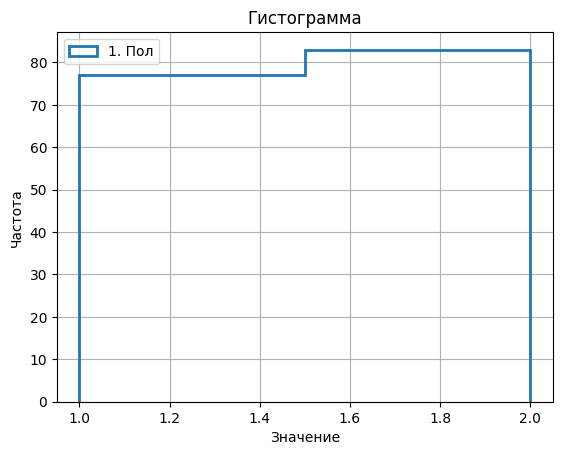

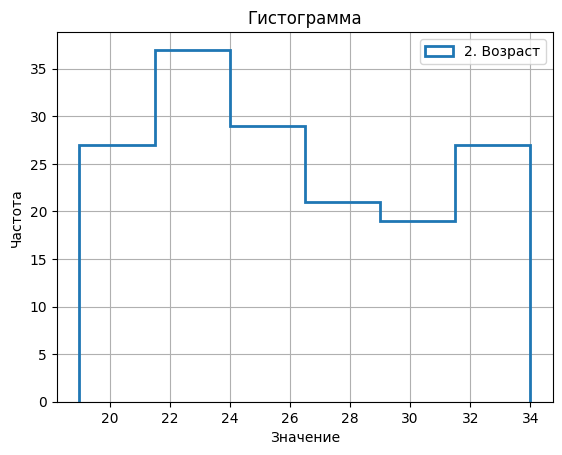

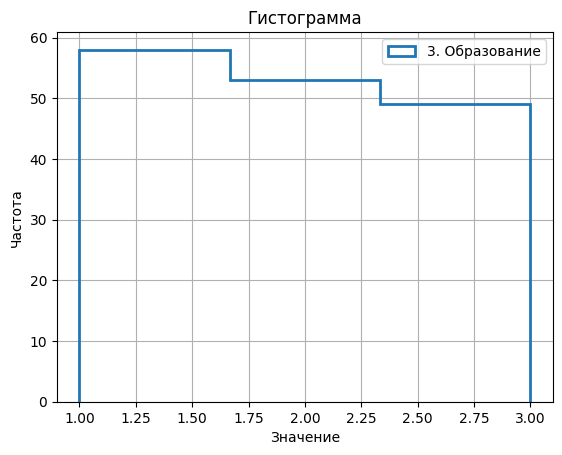

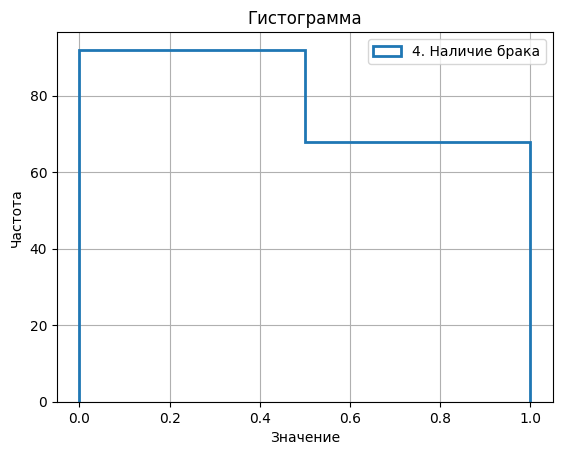

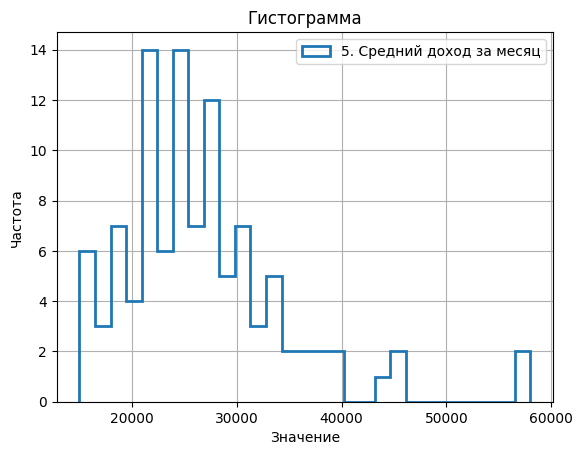

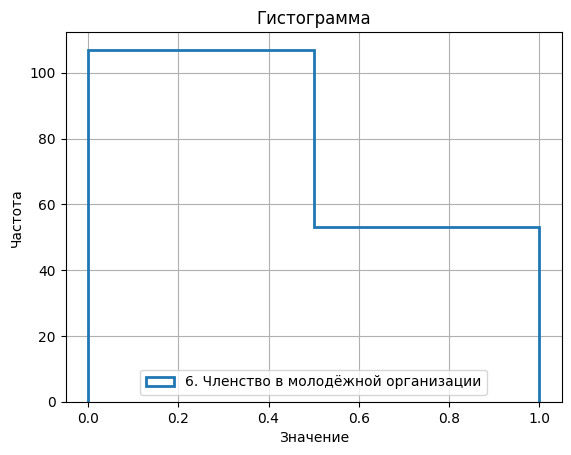

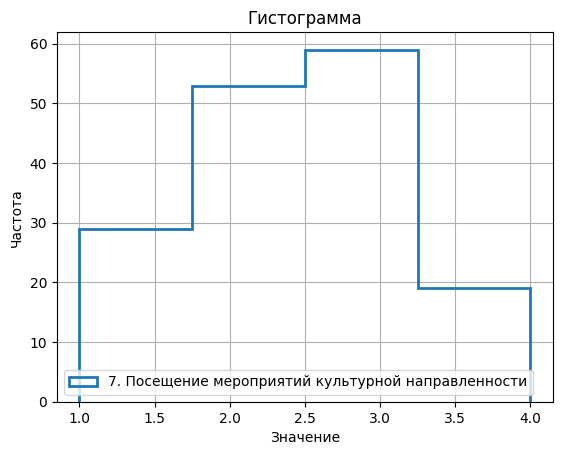

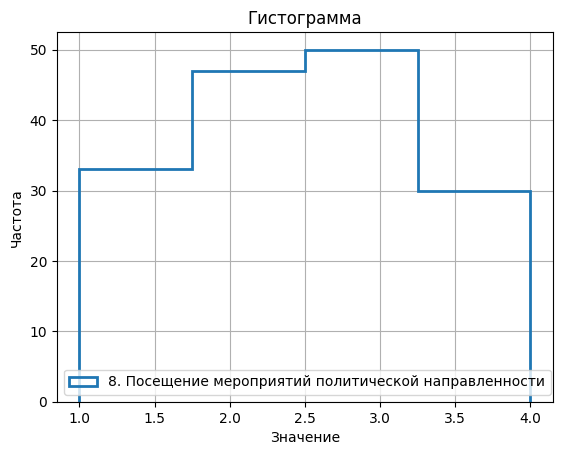

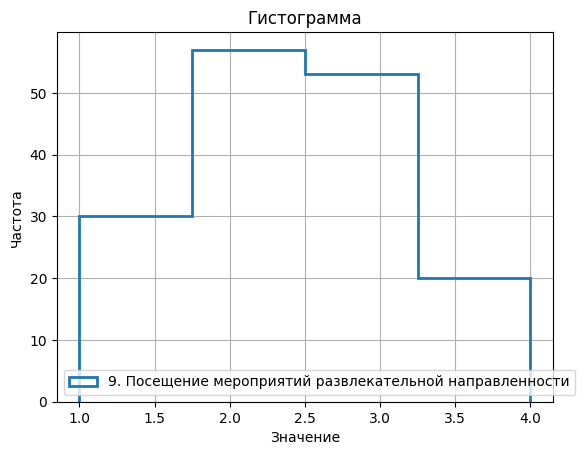

In [106]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'image/raw'
else:
    path = ''

# Построение гистограмм для выбранных данных:
histogram(
    table=df_data,
    series=column_headers_show_hist,
    path_to_save=path
    )


#### Диаграммы размаха

Диаграмма размаха (коробчатая диаграмма, ящик с усами) является способом отображения данных, который позволяет изобразить основные данные о распределении признака с помощью построения на координатной плоскости прямоугольника с двумя отрезками, исходящими из противоположных сторон прямоугольника. На оси, вдоль которой расположен прямоугольник и отрезки, изображены значения признака.

Стороны прямоугольника, из которых исходят отрезки, расположены на уровне значений, указывающих на границы между первым и вторым квартилями и третьим и четвёртым квартилями значений признака. Черта внутри прямоугольника указывает на расположение медианы значений признака. Концы линий, выходящих из прямоугольника влево и вправо, указывают на наблюдаемые максимум и минимум значений признака X, без учёта выбросов. Возможные кружки за пределами отрезков указывают на выбросы (редкие и сильно отличающиеся значения).


Для построения диаграмм размаха используется функция box_diagram().


In [107]:
def box_diagram(table: pd.DataFrame, series: list, path_to_save: str = ''):

    """
    Построение коробчатой диаграммы (диаграммы размаха, ящика с усами).

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    path_to_save - по ум. = '', путь для сохранения файлов.
    """

    # Создание папки для изображений:
    if path_to_save != '':

        # Нумерация построенных изображений:
        box_number = 0

        # Создание подпапки:
        path_to_save = path_to_save + '/box'

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для изображений:
            output_dir.mkdir(parents=True, exist_ok=True)

    # Перебор всех выбранных столбцов:
    for s in series:

        # Построение горизонтальной коробчатой диаграммы. При желании изобразить
        # диаграмму вертикально, последний параметр надо изменить с False на True:
        table.boxplot(s, vert=False)

        # Добавление подписей к осям и заголовка:
        plt.title('Диаграмма размаха')
        plt.xlabel('Значения')

        # Поворот подписи слева от диаграммы для экономии места:
        plt.yticks(rotation=90, va='center')

        # Сохранение изображения:
        if path_to_save != '':

            # Установка имени файла и пути к нему:
            output_file = output_dir / ('box_' + str(box_number) + '.png')

            # Сохранение файла:
            plt.savefig(output_file)

            # Изменение значения количества построенных изображений:
            box_number = box_number + 1

        # Отображение диаграммы:
        plt.show()


Построение диаграмм размаха.

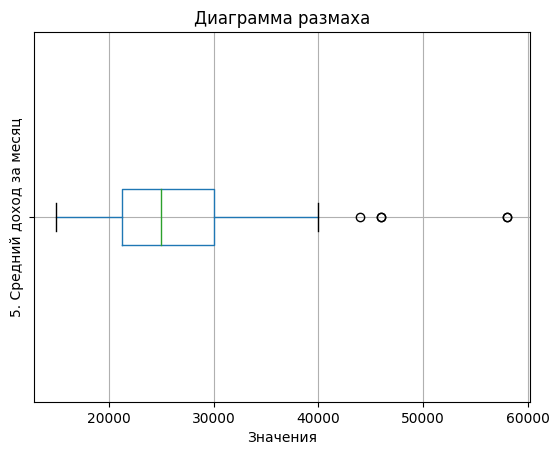

In [108]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'image/raw'
else:
    path = ''

# Построение коробчатых диаграмм для выбранных данных:
box_diagram(
    table=df_data,
    series=column_headers_show_box,
    path_to_save=path
    )


#### Точечные диаграммы

Точечная диаграмма является способом отображения данных, в ходе которого можно наглядно наблюдать зависимость значений одного признака от значений другого признака.

На координатной плоскости на горизонтальной и вертикальной осях отображаются значения двух признаков, а точки на плоскости указывают на наблюдения, имеющие значения каждого из признаков, соответствующие шкалам на координатных осях.


Для построения точечной диаграммы используется функция scatter_diagram().

In [109]:
def scatter_diagram(table: pd.DataFrame, series: list, path_to_save: str = ''):

    """
    Построение точечной диаграммы.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    path_to_save - по ум. = '', путь для сохранения файлов.
    """

    # Создание папки для изображений:
    if path_to_save != '':

        # Нумерация построенных изображений:
        dot_number = 0

        # Создание подпапки:
        path_to_save = path_to_save + '/dot'

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для изображений:
            output_dir.mkdir(parents=True, exist_ok=True)

    # Перебор всех пар указанных стролбцов без повоторений:
    for i in column_headers_show_dot:
        for j in column_headers_show_dot:
            if i >= j: continue

            # Подготовка значений для построения диаграммы:
            data_list_1 = table[i].tolist()
            data_list_2 = table[j].tolist()

            # Построение точечной диаграммы:
            plt.scatter(data_list_1, data_list_2)

            # Добавление подписей к осям и заголовка:
            plt.xlabel(i)
            plt.ylabel(j)
            plt.title('Точечная диаграмма')

            # Сохранение изображения:
            if path_to_save != '':

                # Установка имени файла и пути к нему:
                output_file = output_dir / ('dot_' + str(dot_number) + '.png')

                # Сохранение файла:
                plt.savefig(output_file)

                # Изменение значения количества построенных изображений:
                dot_number = dot_number + 1

            # Отображение диаграммы:
            plt.show()


Построение точечной диаграммы.

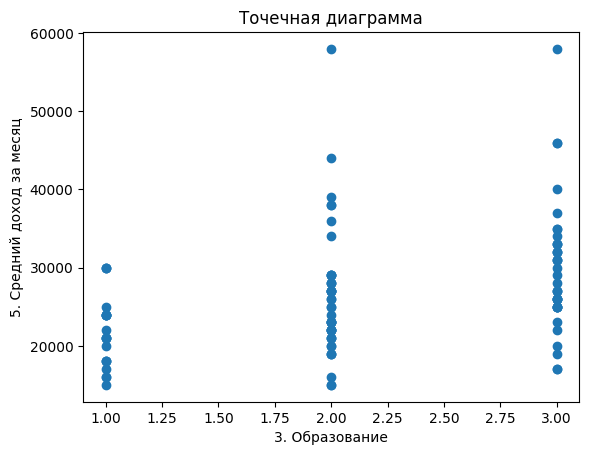

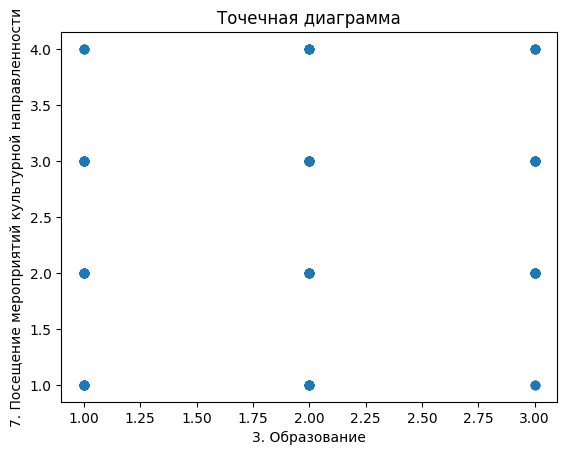

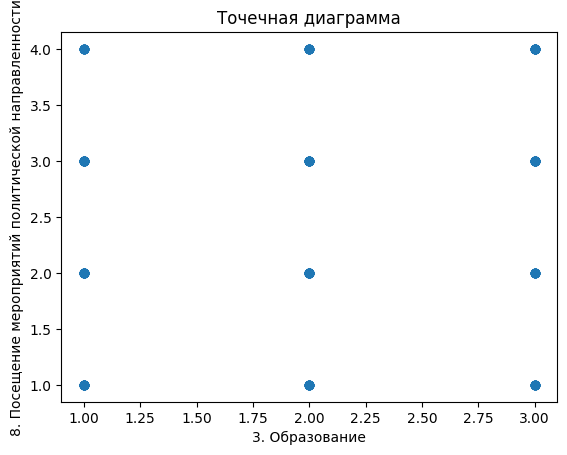

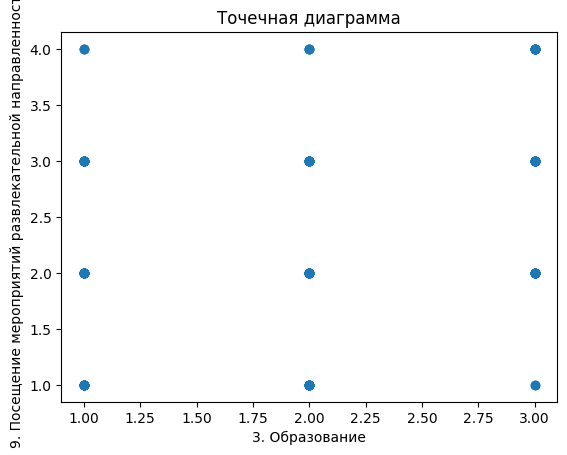

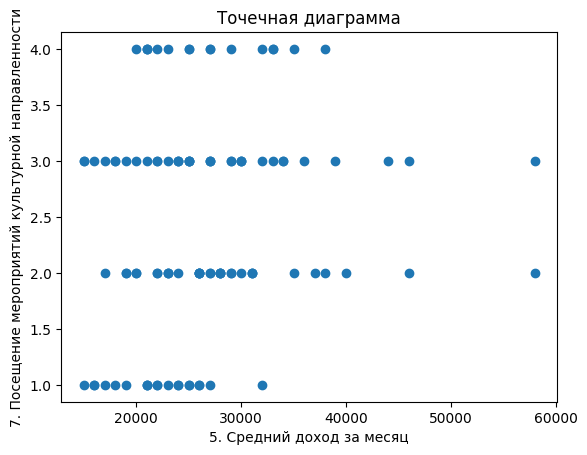

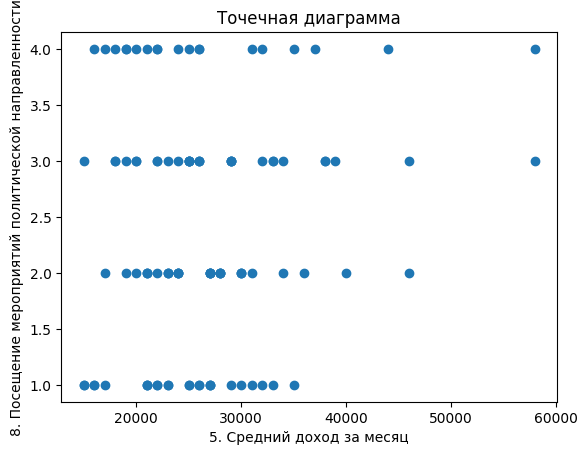

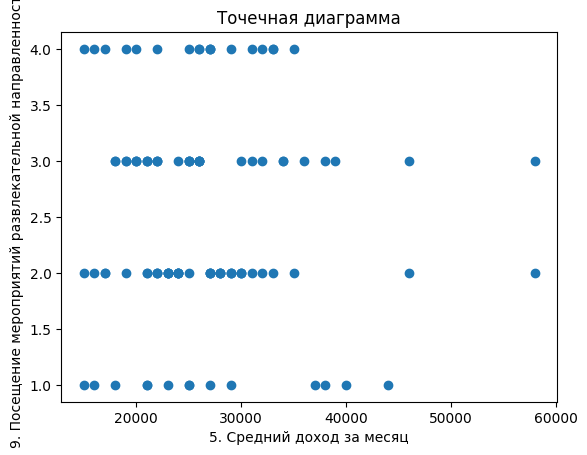

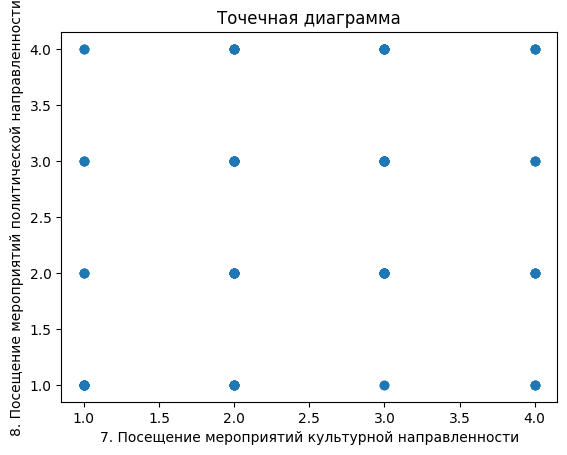

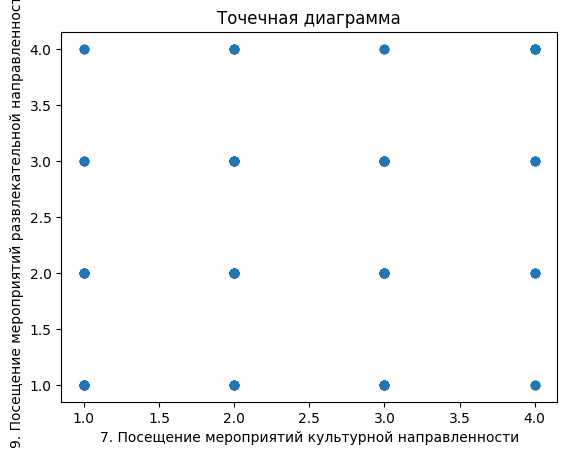

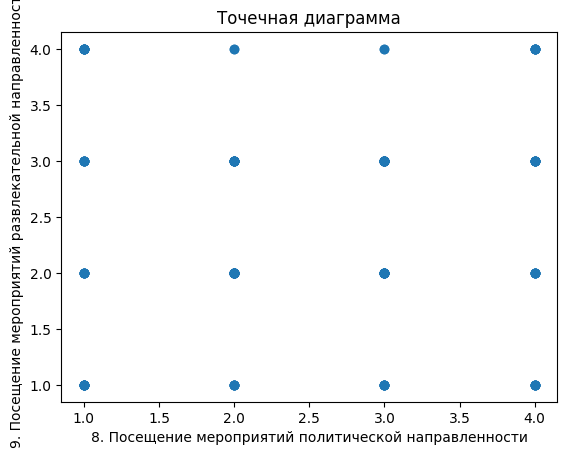

In [110]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'image/raw'
else:
    path = ''

# Построение точеченых диаграмм для выбранных данных:
scatter_diagram(
    table=df_data,
    series=column_headers_show_dot,
    path_to_save=path
    )


### Удаление пустых значений


Пустые значения не пригодны для вычислений, и могут оказывать воздействие на вычисление различных метрик и проведение анализа данных. Поэтому пустые значения обычно удаляются из таблицы.

Выбор столбцов для удаления пустых значений. Примеры выбора столбцов приведены ниже в комментариях.

**РЕДАКТИРОВАНИЕ КОДА**

In [111]:
# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_void = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_void = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_s.remove(i)

column_headers_void = df_data.columns.tolist()


Для удаления пустых значений используется функция void_killer().

In [112]:
def void_killer(
        table: pd.DataFrame,
        series: list,
        mod: str = 'delete'
        ) -> pd.DataFrame:

    """
    Удаление пустых значений.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    mod - по ум. 'delete', так же возможно 'mean', 'median'.

    Возвращает pd.DataFrame.
    """

    for s in series:

        # Получение индексов строк с пропусками:
        # void_r = table[s][table[s].isnull().any(axis=1)].index.tolist()
        void_i = table[s].loc[table[s].isna()].index

        # Удаление строк с пустыми значениями:
        if mod == 'delete':

            for i in void_i:
                print(f'Пустое значение "{s}[{i}]" удаляется со строкой.')

            table = table.drop(void_i)

        # Замена пустых значений медианой:
        if mod == 'mean':

            for i in void_i:

                print(f'Пустое значение "{s}[{i}]" \
заменяется на среднее арифметическое столбца.')

            # Преобразование данных в массив numpy:
            np_data = table[s].to_numpy()

            # Удаление значений, равных NaN:
            np_data = np_data[~np.isnan(np_data)]

            # Вычисление среднего арифметического:
            mean = np_data.mean()

            table.loc[void_i, s] = mean

        if mod == 'median':

            for i in void_i:
                print(f'Пустое значение "{s}[{i}]" заменяется на медиану столбца.')

            # Преобразование данных в массив numpy:
            np_data = table[s].to_numpy()

            # Удаление значений, равных NaN:
            np_data = np_data[~np.isnan(np_data)]

            # Вычисление медианы:
            median = np.median(np_data)

            table.loc[void_i, s] = median

    return table


Удаление пустых значений.

**РЕДАКТИРОВАНИЕ КОДА**

In [113]:
# Удаление пустх значений.
# Для удаления строк, содержащих пустые значеиня, установить значеине аргумента
# mod='delete'.
# Для замены пустых значений на среднее арифметическое, установить значеине
# аругмента mod='mode'.
# Для замены пустых значений на медиану, установить значеине
# аругмента mod='median'.

df_data = void_killer(df_data, column_headers_void, mod='delete')


Пустое значение "5. Средний доход за месяц[0]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[1]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[2]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[7]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[12]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[13]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[15]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[17]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[18]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[20]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[21]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[22]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[23]" удаляется со строкой.
Пустое значение "5. Средний доход за месяц[24]" удаляется со строкой.
Пустое значение "5. Сред

Просмотр данных после удаления пустых значений.

**РЕДАКТИРОВАНИЕ КОДА**

In [114]:
# Вывод общей информации о таблице:
print(df_data.info(), end = '\n\n')

# Вывод первых 5 строк таблицы:
display(df_data.head(5))

# Ввыод последних 5 строк таблицы:
# display(df_data_ns.tail(5))

# Вывод всей таблицы:
# display(df_data_ns)

# Вывод среза таблицы, например, с 10 по 20 строки:
# df_data_ns[10:20]


<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 3 to 157
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   1. Пол                                                   106 non-null    int64  
 1   2. Возраст                                               106 non-null    int64  
 2   3. Образование                                           106 non-null    int64  
 3   4. Наличие брака                                         106 non-null    int64  
 4   5. Средний доход за месяц                                106 non-null    float64
 5   6. Членство в молодёжной организации                     106 non-null    int64  
 6   7. Посещение мероприятий культурной направленности       106 non-null    int64  
 7   8. Посещение мероприятий политической направленности     106 non-null    int64  
 8   9. Посещение мероприятий развлекател

,1. Пол,2. Возраст,3. Образование,4. Наличие брака,5. Средний доход за месяц,6. Членство в молодёжной организации,7. Посещение мероприятий культурной направленности,8. Посещение мероприятий политической направленности,9. Посещение мероприятий развлекательной направленности
3,1,34,3,1,32000.0,0,3,4,2
4,1,28,3,0,33000.0,0,4,3,4
5,1,25,3,0,17000.0,0,3,4,4
6,1,25,3,0,35000.0,0,4,4,2
8,1,34,2,1,58000.0,1,2,3,2


### Удаление выбросов

Выброс (экстремальное значение, аномальное значение) – редкое значение характеристики, значительно отличающееся от других значений.

Выбросы могут быть вызваны как ошибкой статистического сбора данных (например, неточность приборов измерения), так и значительно отличающимися крайне редкими значениями, которые реально встречаются на практике.

Удаляются выбросы потому, что оказывают значительное воздействие на различные метрики и результаты анализа данных, которое не пропорционально относительной частоте их наблюдения.


Выбор столбцов для удаления выбросов. Примеры выбора столбцов приведены ниже в комментариях.

**РЕДАКТИРОВАНИЕ КОДА**

In [115]:
# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_trash_clean = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_trash_clean = df_data.columns.tolist()
# Тут необходимо перечислить столбцы, которые не требудется использовать:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]
# for i in data_remove:
#     column_headers_trash_clean.remove(i)

column_headers_trash_clean = ["5. Средний доход за месяц"]


Для удаления выбросов используется функция filter_outliers().

In [116]:
def filter_outliers(
        table: pd.DataFrame,
        series: list,
        mod: str = 'mean'
        ) -> pd.DataFrame:

    """
    Удаление выбросов.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    mod - по ум. 'mean', так же возможно 'square', 'delete'.

    Возвращает pd.DataFrame.
    """

    for s in series:

        # ОПРЕДЕЛЕНИЕ ГРАНИЦ ВЫБРОСОВ

        # Первый и третий квартили:
        q1 = table[s].quantile(0.25)
        q3 = table[s].quantile(0.75)

        # Межквартальный размах:
        iqr = q3 - q1

        # Границы выбросов:
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Определение индексов строк с выбросами:
        i_outliers = table[
            (table[s] < lower_bound) | (table[s] > upper_bound)
            ].index

        # УДАЛЕНИЕ ВЫБРОСОВ

        # Проверка, надо ли удалять выбросы в рассматриваемом столбце s:
        if not i_outliers.empty:

            # Замена значений выбросов на среднее арифметическое значений
            # столбца:
            if mod == 'mean':
                mean = round(table[s].mean(), 3)
                for i in i_outliers:
                    print(f'Замента значения "{s}[{i}]" = {table.loc[i, s]} \
на среднее арифметическое значений столбца, равное {mean}.')
                    table.loc[i, s] = mean

            # Применение преобразования квадратного корня значений столбца:
            if mod == 'square':
                print(f'Применение преобразования квадратного корня к столбцу \
"{s}" из-за встреченных значений:')
                for i in i_outliers:
                    print(f'"{s}[{i}]" = {table.loc[i, s]}')
                table[s] = np.sqrt(table[s])

            # Удаление строк с выбросами:
            if mod == 'delete':
                for i in i_outliers:
                    print(f'Удаление строки "{i}" из-за встреченного \
"{table.loc[i, s]}" в столбце "{s}"')
                table = table[
                    (table[s] >= lower_bound) & (table[s] <= upper_bound)
                    ]

                # Защита от столбцов с одинаковым содержанием ячеек
                # после удаления выбросов:

                # Список столбцов для удаления:
                no_sence_columns_to_drop = []

                # Проверка каждого столбца на наличие одинаковых значений:
                for column in table.columns:
                    if table[column].nunique() == 1:
                        print(f'Столбец "{column}" после удаления выбросов \
содержит одинаковые значения и удаляется.')
                        no_sence_columns_to_drop.append(column)

                # Удаляем столбцы с одинаковыми значениями:
                table = table.drop(columns=no_sence_columns_to_drop)

    return table


Применение функции filter_outliers() для нахождения и обработки найденных выбросов. Возможные варианты обработки выбросов:

* Замена значений выбросов на среднее арифметическое значений столбца. Позволяет избавиться от выбросов, при этом отразив тенденцию, на которую выбросы, возможно, указывают.

* Применение преобразования квадратного корня заменяет все значения в столбце на квадратные корни этих значений. Позволяет избавиться от выбросов, сводя их влияние на выборку к минимуму.

* Удалить строки таблицы с выбросами. При этом варианте выборосы не будут никак влиять на всю выборку в целом.

Решение о том, какой вариант использовать, остаётся за исследователем, и зависит от обрабатываемых значений, задач исследования и т. п.

Удаление выбросов.

**РЕДАКТИРОВАНИЕ КОДА**

In [117]:
# Для замены выбросов на среднее арифметическое значение столбца установить
# значение аргумента mod='mean'.

# Для применения преобразования квадратного корня установить значение аргумента
# mod='square'.

# Для удаления строк с выбросами установить значение аргумента mod='delete'.
# При этом могут возникнуть столбцы с одинаковыми значениями, которые будут
# удалены, о чём будет вывведено сообщение.

df_data = filter_outliers(df_data, column_headers_trash_clean, mod='mean')


Замента значения "5. Средний доход за месяц[8]" = 58000.0 на среднее арифметическое значений столбца, равное 26584.906.
Замента значения "5. Средний доход за месяц[9]" = 46000.0 на среднее арифметическое значений столбца, равное 26584.906.
Замента значения "5. Средний доход за месяц[14]" = 46000.0 на среднее арифметическое значений столбца, равное 26584.906.
Замента значения "5. Средний доход за месяц[77]" = 44000.0 на среднее арифметическое значений столбца, равное 26584.906.
Замента значения "5. Средний доход за месяц[80]" = 58000.0 на среднее арифметическое значений столбца, равное 26584.906.


Просмотр данных после удаления выбросов.

**РЕДАКТИРОВАНИЕ КОДА**

In [118]:
# Вывод общей информации о таблице:
print(df_data.info(), end = '\n\n')

# Вывод первых 5 строк таблицы:
display(df_data.head(5))

# Ввыод последних 5 строк таблицы:
# display(df_data.tail(5))

# Вывод всей таблицы:
# display(df_data)

# Вывод среза таблицы, например, с 10 по 20 строки:
# df_data[10:20]

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 3 to 157
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   1. Пол                                                   106 non-null    int64  
 1   2. Возраст                                               106 non-null    int64  
 2   3. Образование                                           106 non-null    int64  
 3   4. Наличие брака                                         106 non-null    int64  
 4   5. Средний доход за месяц                                106 non-null    float64
 5   6. Членство в молодёжной организации                     106 non-null    int64  
 6   7. Посещение мероприятий культурной направленности       106 non-null    int64  
 7   8. Посещение мероприятий политической направленности     106 non-null    int64  
 8   9. Посещение мероприятий развлекател

,1. Пол,2. Возраст,3. Образование,4. Наличие брака,5. Средний доход за месяц,6. Членство в молодёжной организации,7. Посещение мероприятий культурной направленности,8. Посещение мероприятий политической направленности,9. Посещение мероприятий развлекательной направленности
3,1,34,3,1,32000.000,0,3,4,2
4,1,28,3,0,33000.000,0,4,3,4
5,1,25,3,0,17000.000,0,3,4,4
6,1,25,3,0,35000.000,0,4,4,2
8,1,34,2,1,26584.906,1,2,3,2


### Вариационные ряды данных

Вариационные ряды позволяют увидеть частоту значений и относительную частоту значений некоторого признака. Вариационные ряды бывают интервальными и дискретными.

Частота значения - то, сколько раз некоторое значение встречалось среди значений признака.

Относительная частота значения - результат деления частоты значения на количество значений признака в дискретном вариационном ряде, и на количество интервалов значений признака в интервальном вариационном ряде.

Дискретный вариационный ряд содержит каждое значение признака. Он хорошо подходит для признаков с номинальными или ранговыми шкалами значений, при которых существует небольшое количество значений.

Интервальный вариационный ряд группирует все значения по интервалам Он хорошо подходит для признаков с метрической шкалой значений, при которых существует большое количество значений.

**РЕДАКТИРОВАНИЕ КОДА**

In [119]:
# ВЫБОР СТОЛБЦОВ ДЛЯ ПОЛУЧЕНИЯ ДИСКРЕТНЫХ ВАРИАЦИОННЫХ РЯДОВ ЗНАЧЕНИЙ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_table_frequency_describe = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_table_frequency_describe = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_table_frequency_describe.remove(i)

column_headers_show_table_frequency_describe = df_data.columns.tolist()
data_remove = ["5. Средний доход за месяц"]
for i in data_remove:
    column_headers_show_table_frequency_describe.remove(i)

# ВЫБОР СТОЛБЦОВ ДЛЯ ПОЛУЧЕНИЯ ИНТЕРВАЛЬНЫХ ВАРИАЦИОННЫХ РЯДОВ ЗНАЧЕНИЙ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_table_frequency_interval = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_table_frequency_interval = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_table_frequency_interval.remove(i)

column_headers_show_table_frequency_interval = ["5. Средний доход за месяц"]


Для построения таблиц вариационных рядов используется функция frequency_table().

In [120]:
def frequency_table(
        table: pd.DataFrame,
        series: str,
        mod: str = 'interval',
        path_to_save: str = ''
        ):
    """
    Функция создаёт таблицу со значениями вариационного ряда.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    mod - по ум. = 'interval', так же возможно 'describe'.
    При 'interval' строится вариационный ряд.
    При 'describe' строится дискретный ряд.

    path_to_save - по ум. = '', путь для сохранения файлов.
    """

    # Создание папки для изображений:
    if path_to_save != '':

        # Настройка подпапки:
        path_to_save = path_to_save + '/' + mod

        # Нумерация построенных изображений:
        freq_number = 0

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для изображений:
            output_dir.mkdir(parents=True, exist_ok=True)

    # Перебор всех выбранных столбцов:
    for s in series:

        # Дискретный вариационный ряд:
        if mod == 'describe':

            # Получение уникальных значений столбца и их сортировка:
            unique_values = sorted((table[s].unique()).tolist())

            # Получение частот значений столбца:
            frequency = [table[table[s] == x].shape[0] for x in unique_values]

            # Получение относительных частот столбца:
            relative_frequency = [f / table.shape[0] for f in frequency]

            # Получение процентных значений:
            percent_frequency = [str(round(f * 100, 0)) + '%' \
            for f in relative_frequency]

            # Создание таблицы с результатами:
            table_frequency = pd.DataFrame({
                "Варианты x_i": unique_values,
                "Частоты n_i": frequency,
                "Относительные частоты w_i": relative_frequency,
                "Процент, %": percent_frequency
            })

            print(f'Вариационный ряд значений столбца "{s}":')
            display(table_frequency)

        # Интервальный вариационный ряд:
        if mod == 'interval':

            # Получение уникальных значений столбца и их сортировка:
            unique_values = sorted(table[s].unique())

            # Вычисление минимального и максимального значений:
            min_value = min(unique_values)
            max_value = max(unique_values)

            # Вычисление количества интервалов:
            if len(unique_values) > 20:
                num_intervals = int(np.sqrt(len(unique_values)))
            else:
                num_intervals = len(unique_values)

            # Вычисление ширины интервала:
            interval_width = (max_value - min_value) / num_intervals

            # Создание интервалов в списке:
            intervals = [[
                min_value + i * interval_width, \
                min_value + (i + 1) * interval_width
                ] for i in range(num_intervals)]
            # Редактирование  последнего интервала для включения в него
            #самых больших значений:
            intervals[-1][-1] = intervals[-1][-1] + 0.0001

            # Вычисление значений для каждого интервала:
            # Перебор всех интервалов:
            result = []
            interval_labels = []
            frequency = []
            relative_frequency = []

            for i in intervals:

                # Добавление интервала:
                interval_labels.append(f"{round(i[0], 3)} - {round(i[1], 3)}")

                # Вычисление частоты значений в интервале:
                count = len(table[(table[s] >= i[0]) & (table[s] < i[1])])
                frequency.append(count)

                # Вычисление относительной частоты значений в интервале:
                relative_freq = count / len(table)
                relative_frequency.append(relative_freq)

                # Получение процентных значений:
                percent_frequency = [str(round(f * 100, 0)) + '%' \
                for f in relative_frequency]

            # Создание таблицы с резульататми:
            table_frequency = pd.DataFrame({
                "Интервал": interval_labels,
                "Частоты n_i": frequency,
                "Относительные частоты w_i": relative_frequency,
                "Процент, %": percent_frequency

            })

            print(f'Интервальный ряд значений столбца "{s}":')
            display(table_frequency)

        # Сохранение таблицы в файл:
        if path_to_save != '':

            # Изменение значения количества построенных таблиц:
            freq_number = freq_number + 1

            # Сохранение таблицы в текущую директорию (папку):
            if mod == 'interval':
                file_name = \
                '/result_table_frequency_interval_' + str(freq_number) + '.csv'
            if mod == 'describe':
                file_name = \
                '/result_table_frequency_describe_' + str(freq_number) + '.csv'
            table_frequency.to_csv(
                path_to_save + file_name,
                index=False
                )


**РЕДАКТИРОВАНИЕ КОДА**

In [121]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'frequency/'
else:
    path = ''

# Создание таблиц с интервальными вариационными рядами:
frequency_table(
    table=df_data,
    series=column_headers_show_table_frequency_describe,
    mod='describe',
    path_to_save=path)

# Создание таблиц с интервальными вариационными рядами:
frequency_table(
    table=df_data,
    series=column_headers_show_table_frequency_interval,
    mod='interval',
    path_to_save=path)

Вариационный ряд значений столбца "1. Пол":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,1,57,0.537736,54.0%
1,2,49,0.462264,46.0%


Вариационный ряд значений столбца "2. Возраст":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,19,4,0.037736,4.0%
1,22,25,0.235849,24.0%
2,25,21,0.198113,20.0%
3,28,15,0.141509,14.0%
4,31,15,0.141509,14.0%
5,34,26,0.245283,25.0%


Вариационный ряд значений столбца "3. Образование":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,1,22,0.207547,21.0%
1,2,45,0.424528,42.0%
2,3,39,0.367925,37.0%


Вариационный ряд значений столбца "4. Наличие брака":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,0,52,0.490566,49.0%
1,1,54,0.509434,51.0%


Вариационный ряд значений столбца "6. Членство в молодёжной организации":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,0,72,0.679245,68.0%
1,1,34,0.320755,32.0%


Вариационный ряд значений столбца "7. Посещение мероприятий культурной направленности":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,1,20,0.188679,19.0%
1,2,34,0.320755,32.0%
2,3,36,0.339623,34.0%
3,4,16,0.150943,15.0%


Вариационный ряд значений столбца "8. Посещение мероприятий политической направленности":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,1,25,0.235849,24.0%
1,2,31,0.292453,29.0%
2,3,31,0.292453,29.0%
3,4,19,0.179245,18.0%


Вариационный ряд значений столбца "9. Посещение мероприятий развлекательной направленности":


,Варианты x_i,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,1,14,0.132075,13.0%
1,2,41,0.386792,39.0%
2,3,33,0.311321,31.0%
3,4,18,0.169811,17.0%


Интервальный ряд значений столбца "5. Средний доход за месяц":


,Интервал,Частоты n_i,Относительные частоты w_i,"Процент, %"
0,15000.0 - 20000.0,16,0.150943,15.0%
1,20000.0 - 25000.0,30,0.283019,28.0%
2,25000.0 - 30000.0,37,0.349057,35.0%
3,30000.0 - 35000.0,15,0.141509,14.0%
4,35000.0 - 40000.0,8,0.075472,8.0%


### Нормализация и стандартизация данных

Для того, чтобы полученные значения можно было сравнивать между собой, их нужно привести к некой общей шкале.

Для категориальных данных применяется стандартизация, для числовых - нормализация.

Категориальные данные (красный, зелёный, синий), в отличии от числовых (большой, средний, малый), не имеют количественного выражения.

Выбор столбцов для нормализации и (или) стандартизации.

**РЕДАКТИРОВАНИЕ КОДА**

In [122]:
# ВЫБОР СТОЛБЦОВ ДЛЯ НОРМАЛИЗАЦИИ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# сolumn_headers_n = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# сolumn_headers_n = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     сolumn_headers_n.remove(i)

сolumn_headers_n = df_data.columns.tolist()

# ВЫБОР СТОЛБЦОВ ДЛЯ СТАНДАРТИЗАЦИИ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_s = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_s = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_s.remove(i)

column_headers_s = []


Для нормализации данных используется функция normalization().

In [123]:
def normalization(table: pd.DataFrame, series: list) -> pd.DataFrame:

    """
    Нормализация данных.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными.

    Возвращает pd.DataFrame.
    """

    for s in series:

        # Минимальное и максимальное значения:
        x_min = table[s].min()
        x_max = table[s].max()

        # Вычисление нормализованного значения:
        table[s] = (table[s] - x_min) / (x_max - x_min)

    return table


Для стандартизации используется функция standartization().

In [124]:
def standardization(table: pd.DataFrame, series: list) -> pd.DataFrame:

    """
    Нормализация данных.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными.

    Возвращает pd.DataFrame.
    """

    for s in series:

        # Среднее арифметическое:
        mean = table[s].mean()

        # Стандартное квадратическое отклонение:
        std = table[s].std()

        # Вычисление стандартизованного значения:
        table[s] = (table[s] - mean) / std

    return table


Для данных, к части из которых (или всем)  была применена стандартизация и (или) нормализация, будет использоваться новая таблица  df_data_ns .

Применение нормализации и (или) стандартизации.

In [125]:
# Создание таблицы для нормализованных и стандартизованных данных:
df_data_ns = df_data.copy(deep=True)

# Нормализация выбранных данных:
df_data_ns = normalization(df_data_ns, сolumn_headers_n)

# Стандартизация выбранных данных:
df_data_ns = standardization(df_data_ns, column_headers_s)


Просмотр данных после нормализации и (или) стандартизации.

In [126]:
# Вывод общей информации о таблице:
print(df_data_ns.info(), end = '\n\n')

# Вывод первых 5 строк таблицы:
display(df_data_ns.head(5))

# Ввыод последних 5 строк таблицы:
# display(df_data_ns.tail(5))

# Вывод всей таблицы:
# display(df_data_ns)

# Вывод среза таблицы, например, с 10 по 20 строки:
# df_data_ns[10:20]


<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 3 to 157
Data columns (total 9 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   1. Пол                                                   106 non-null    float64
 1   2. Возраст                                               106 non-null    float64
 2   3. Образование                                           106 non-null    float64
 3   4. Наличие брака                                         106 non-null    float64
 4   5. Средний доход за месяц                                106 non-null    float64
 5   6. Членство в молодёжной организации                     106 non-null    float64
 6   7. Посещение мероприятий культурной направленности       106 non-null    float64
 7   8. Посещение мероприятий политической направленности     106 non-null    float64
 8   9. Посещение мероприятий развлекател

,1. Пол,2. Возраст,3. Образование,4. Наличие брака,5. Средний доход за месяц,6. Членство в молодёжной организации,7. Посещение мероприятий культурной направленности,8. Посещение мероприятий политической направленности,9. Посещение мероприятий развлекательной направленности
3,0.0,1.0,1.0,1.0,0.680000,0.0,0.666667,1.000000,0.333333
4,0.0,0.6,1.0,0.0,0.720000,0.0,1.000000,0.666667,1.000000
5,0.0,0.4,1.0,0.0,0.080000,0.0,0.666667,1.000000,1.000000
6,0.0,0.4,1.0,0.0,0.800000,0.0,1.000000,1.000000,0.333333
8,0.0,1.0,0.5,1.0,0.463396,1.0,0.333333,0.666667,0.333333


### Представление обработанных данных

При представлении обарботанных данных можно получить иную информацию, в отличии от представления необработанных данных (например, из-за удаления выбросов и пустых значений).

Выбор столбцов для представления в виде:

1) Гистограммы.

2) Диаграммы размаха (коробчатой диаграммы).

3) Точечной диагрммы.


**РЕДАКТИРОВАНИЕ КОДА**

In [127]:
# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ ГИСТОГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_hist = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_hist = df_data_ns.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_hist = df_data_ns.columns.tolist()

# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ КОРОБЧАТЫХ ДИАГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_box = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_box = df_data_ns.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_box = ['5. Средний доход за месяц']

# ВЫБОР СТОЛБЦОВ ДЛЯ ПРЕДСТАВЛЕНИЯ В ВИДЕ ТОЧЕЧНЫХ ДИАГРАММ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_show_dot = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_show_dot = df_data_ns.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_show_hist.remove(i)

column_headers_show_dot = df_data_ns.columns.tolist()
data_remove = [
    '1. Пол',
    '2. Возраст',
    '4. Наличие брака',
    '6. Членство в молодёжной организации'
    ]
for i in data_remove:
    column_headers_show_dot.remove(i)


#### Гистограммы

Построение гистограмм.

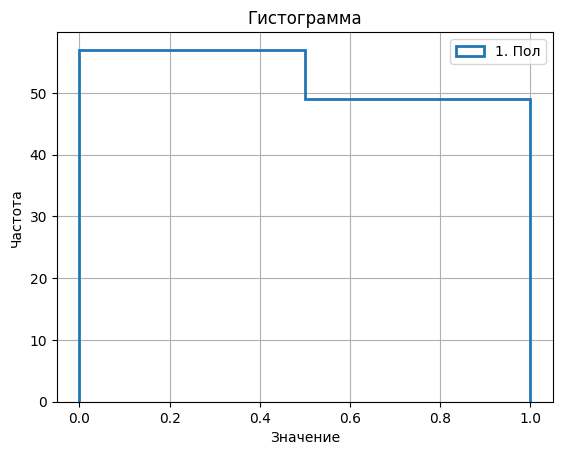

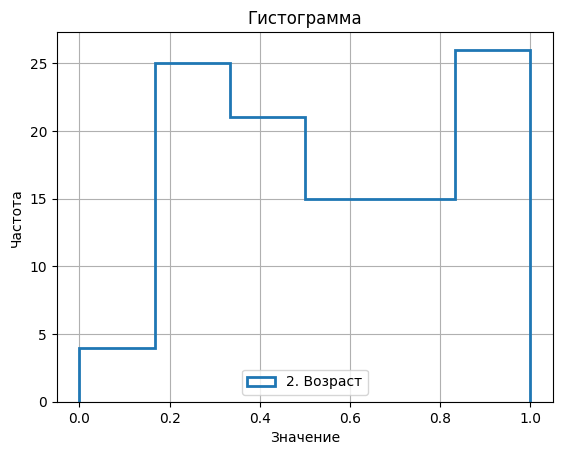

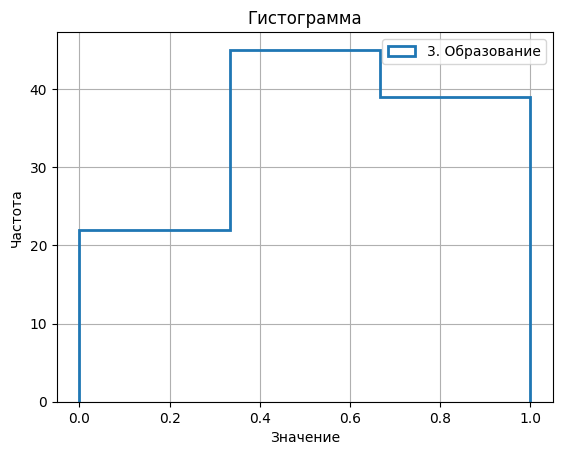

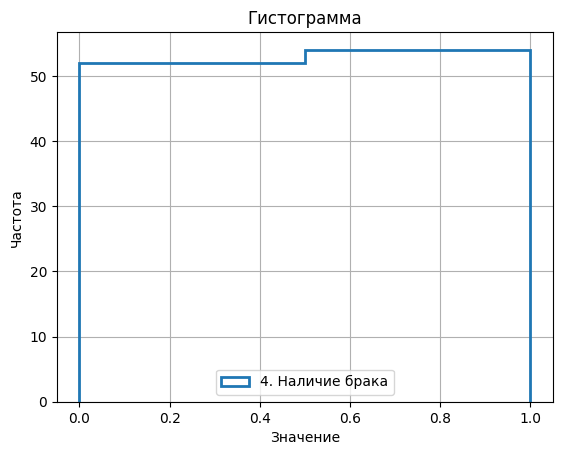

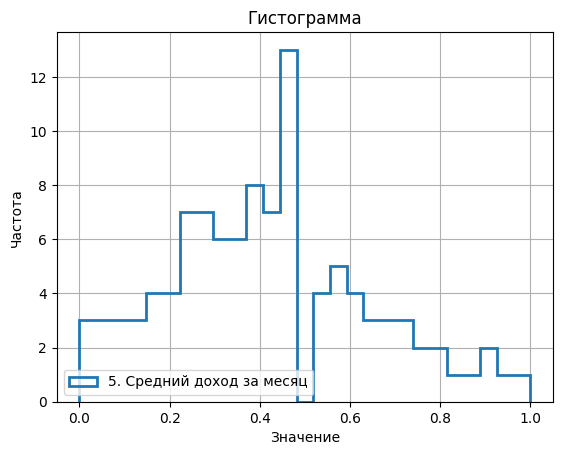

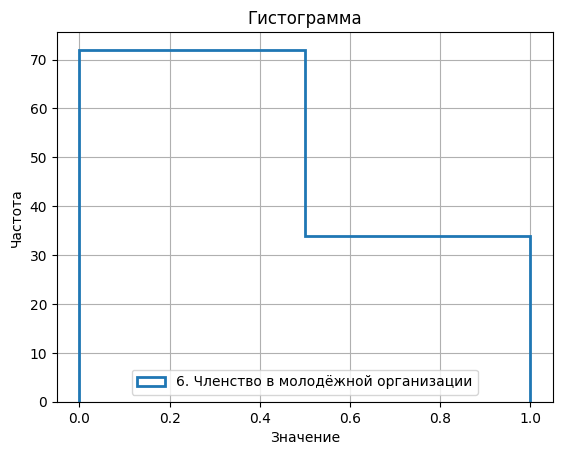

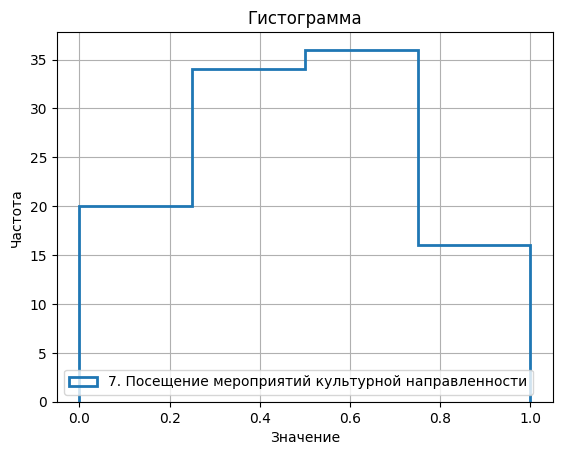

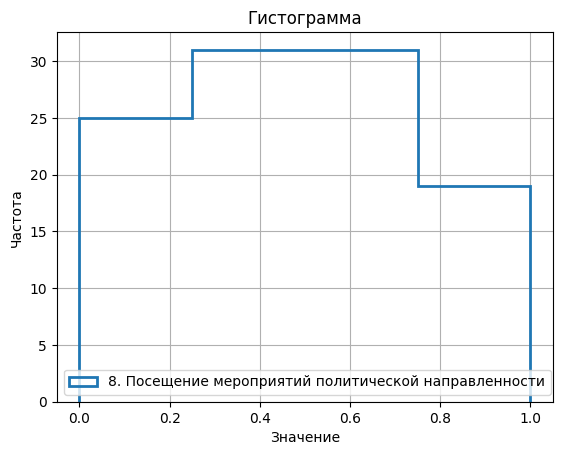

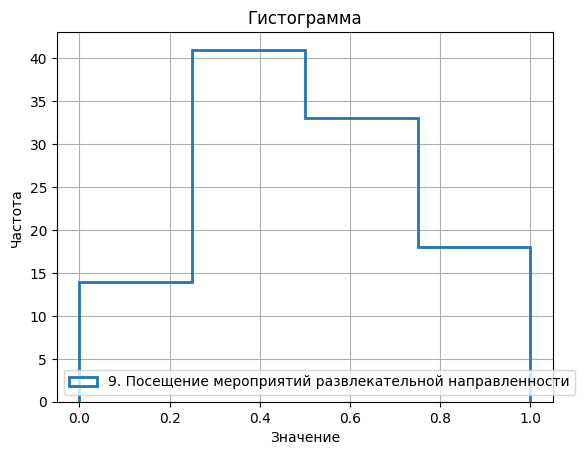

In [128]:
# Создание подпапки для сохранения файлов (при необходимости).
if path != '':
    path = files_storage + 'image/processed/'

# Построение гистограмм для выбранных данных:
histogram(
    table=df_data_ns,
    series=column_headers_show_hist,
    path_to_save=path
    )


#### Диаграммы размаха

Построение диаграмм размаха.

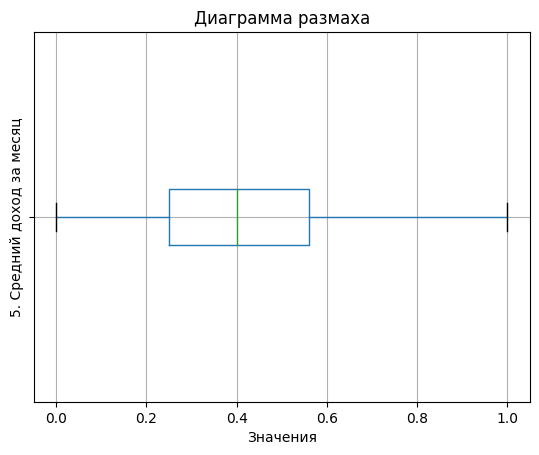

In [129]:
# Создание подпапки для сохранения файлов (при необходимости).
if path != '':
    path = files_storage + 'image/processed/'

# Построение коробчатых диаграмм для выбранных данных:
box_diagram(
    table=df_data_ns,
    series=column_headers_show_box,
    path_to_save=path
    )


#### Точечные диаграммы

Построение точечной диаграммы.

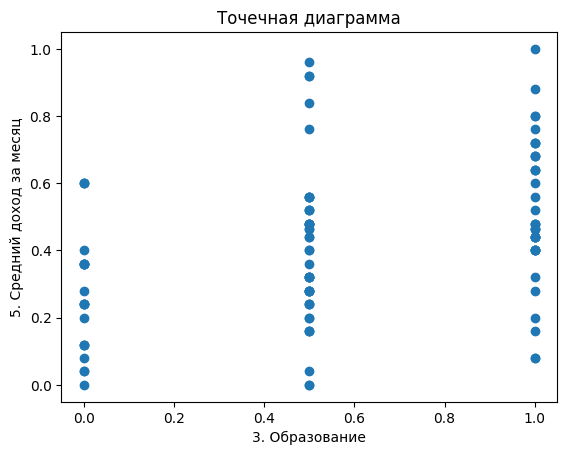

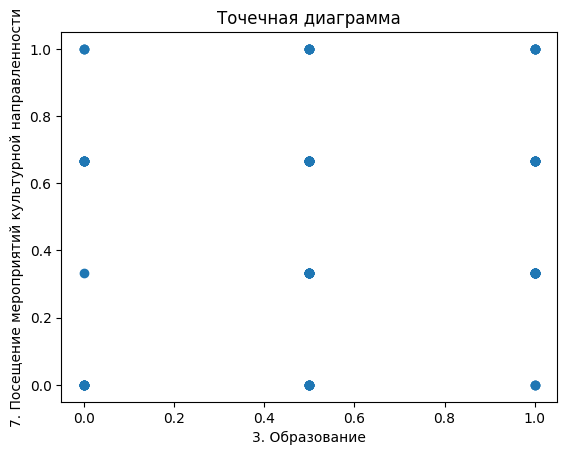

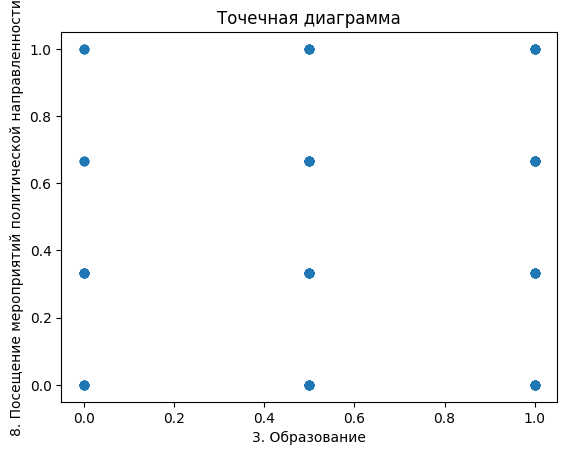

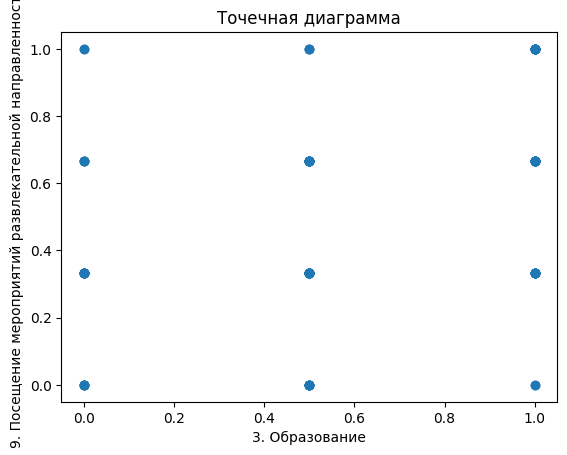

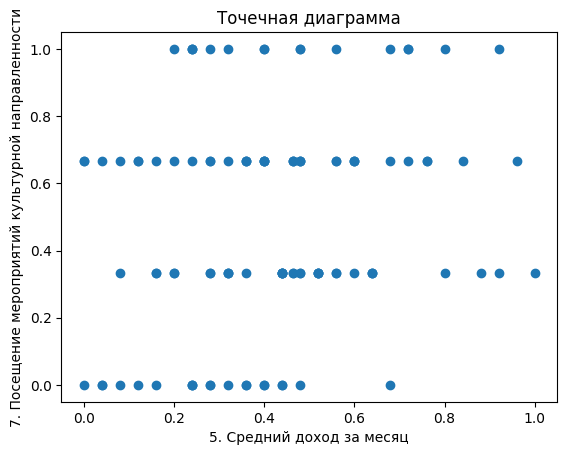

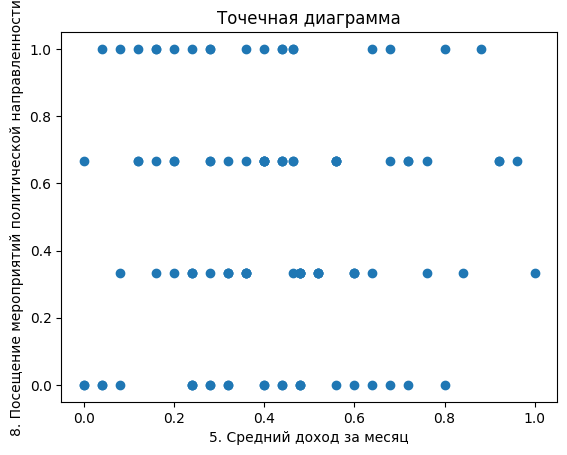

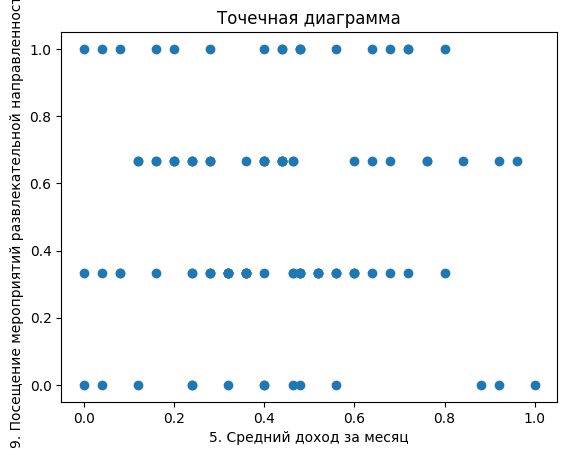

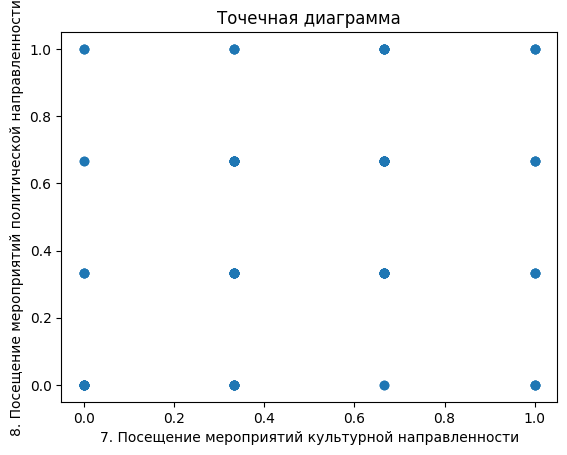

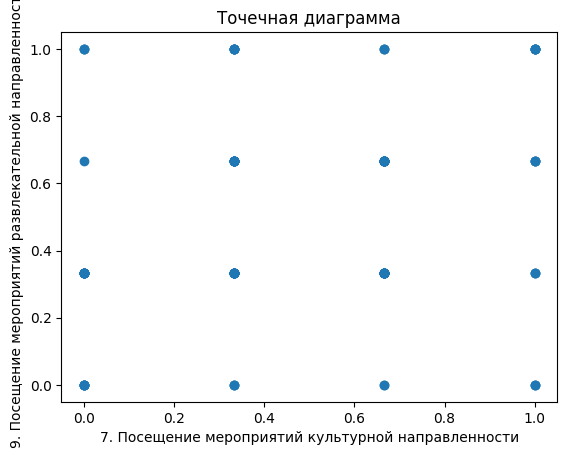

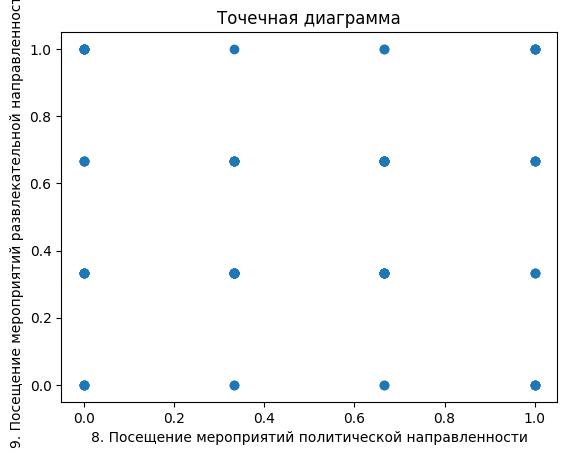

In [130]:
# Создание подпапки для сохранения файлов (при необходимости).
if path != '':
    path = files_storage + 'image/processed/'

# Построение точеченых диаграмм для выбранных данных:
scatter_diagram(
    table=df_data_ns,
    series=column_headers_show_dot,
    path_to_save=path
    )


### Вычисление описательных метрик

Описательные метрики позволяют получить некоторое представление о собранных данных, не прибегая к методам анализа данных.

**Мода** - наиболее часто встречающееся значение среди случайных величин выборки.  

*   Если существует лишь одно рнаиболее часто встречающееся значение, то считается, что дискретное распределение является унимодальным.

*   Если существует два наиболее часто встречающихся значения, то считается, что дискретное распределение является двухмодальным.

*   Если существует более двух наиболее часто встречающихся значения, то считается, что дискретное распределение является мультимодальным.

**Медиана** - значение [(n + 1)/2]-й порядковой статистики при не
нечетном объеме выборки n; значение суммы (n/2)-й и [(n/2) + 1]-й порядковых статистик, деленной на два, при четном объеме выборки n.

**Среднее арифметическое** (выборочное среднее) - сумма случайных величин выборки, деленная на число слагаемых в этой сумме.

**Дисперсия** - сумма квадратов отклонений случайных величин выборки от их выборочного среднего, деленная на число слагаемых в этой сумме минус один.

**Среднее квадратическое отклонение** - положительный квадратный корень из дисперсии.

Чем среднее квадратическое отклонение больше, тем более рассеянные данные в выборке.

**Асимметрия и эксцесс** позволяют оценить "на глаз", насколько близко распределение к нормальному.

Интерпретация значения коэффициента асимметрии:

* Чем коэффициент асимметрии меньше 0, тем более "левосторонняя" асимметрия, и тем более удлинён левый "хвост" распредления.
* Чем коэффициент асимметрии больше 0, тем более "правосторонняя" асимметрия, и тем более удлинён правый "хвост" распредления.
* Чем коэффициент асимметрии по модулю меньше, тем ближе распредление к нормальному.

Интерпретация значения коэффициента эксцесса:

* Чем коэффициент эксцесса больше нуля, тем график распределения более "островершинный".
* Чем коэффициент эксцесса меньше нуля, тем график распредления более пологий.
* Чем коэффициент эксцесса ближе к нулю, тем ближе распределение к нормальному.


**РЕДАКТИРОВАНИЕ КОДА**

In [131]:
# ВЫБОР СТОЛБЦОВ ДЛЯ ВЫЧИСЛЕНИЯ ОПИСАТЕЛЬНЫХ МЕТРИК

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_analysis_metrics = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_analysis_metrics = df_data_ns.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_analysis_AE.remove(i)

column_headers_analysis_metrics = df_data_ns.columns.tolist()
# Тут необходимо перечислить столбцы, которые не требудется использовать


Для вычисления описательных метрик используется функция metrics().

In [132]:
def metrics(
        table: pd.DataFrame,
        series: list,
        path_to_save: str = ''
        ) -> pd.DataFrame:

    """
    Нахождение описательных метрик данных.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    path_to_save - по ум. = '', путь для сохранения файлов.

    Возврашает pd.DataFrame.
    """

    # ВЫЧИСЛЕНИЕ МЕТРИК

    # Создание таблицы, куда будет размещаться ответ:
    column_names_metrics = [
        'Данные',
        'n',
        'Мода',
        'Медиана',
        'Среднее арифметическое',
        'Дисперсия',
        'Среднее квадратическое отклонение',
        'Асимметрия',
        'Эксцесс'
        ]
    result_metrics = pd.DataFrame(columns = column_names_metrics)

    for s in series:

        # Преобразование данных в массив numpy:
        np_data = table[s].to_numpy()

        # РАСЧЁТ ОПИСАТЕЛЬНЫХ СТАТИСТИК

        # Вычисление моды:
        mode = sci.stats.mode(np_data)[0]

        # Вычисление медианы:
        median = np.median(np_data)

        # Вычисление среднего квадратического:
        std = np.std(np_data)

        # Объём выборки:
        n = len(np_data)

        # Вычисление среднего арифметического:
        mean = np_data.mean()

        # Вычисление выборочной дисперсии:
        # Для вычисления генеральной дисперсии необходимо
        # приравнять значение ddof нулю: ddof = 0
        variance = np.var(np_data, ddof = 1)

        # Вычисление асимметрии:
        A = np.mean(((np_data - mean) ** 3) / variance ** (3 / 2))

        # Вычисление эксцесса:
        E = np.mean(((np_data - mean) ** 4) / (variance ** 2))

        # Создание таблицы с результатами:
        result = pd.DataFrame({
            'Данные': [s],
            'n': [n],
            'Мода': [round(mode, 3)],
            'Медиана': [round(median, 3)],
            'Среднее арифметическое': [round(mean, 3)],
            'Дисперсия': [round(variance, 3)],
            'Среднее квадратическое отклонение': [round(std, 3)],
            'Асимметрия': [round(A, 3)],
            'Эксцесс': [round(E, 3)]
            })

        result_metrics = pd.concat([result_metrics, result])

    # Восстановление индексов таблицы:
    result_metrics = result_metrics.reset_index(drop=True)

    # СОЗДАНИЕ ФАЙЛА ТАБЛИЦЫ С РЕЗУЛЬТАТОМ

    if path_to_save != '':

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для таблицы:
            output_dir.mkdir(parents=True, exist_ok=True)

        # Сохранение таблицы с метриками в текущую директорию (папку):
        result_metrics.to_csv(
            path_to_save + '/result_table_metrics.csv',
            index=False
            )

    return result_metrics


Вычисление описательных метрик.


In [133]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'metrics/'
else:
    path = ''

# Вычисление описательных матрик для нормализованных значений:
result_table_metrics = metrics(
    table=df_data_ns,
    series=column_headers_analysis_metrics,
    path_to_save=path
    )

print('Результат нахождения описатлеьных метрик для данных в выбранных \
столбцах.\n')
display(result_table_metrics)


Результат нахождения описатлеьных метрик для данных в выбранных столбцах.



,Данные,n,Мода,Медиана,Среднее арифметическое,Дисперсия,Среднее квадратическое отклонение,Асимметрия,Эксцесс
0,1. Пол,106,0.000,0.000,0.462,0.251,0.499,0.149,1.004
1,2. Возраст,106,1.000,0.600,0.570,0.104,0.321,0.041,1.597
2,3. Образование,106,0.500,0.500,0.580,0.139,0.371,-0.262,1.816
3,4. Наличие брака,106,1.000,1.000,0.509,0.252,0.500,-0.037,0.983
4,5. Средний доход за месяц,106,0.400,0.400,0.418,0.052,0.227,0.343,2.728
5,6. Членство в молодёжной организации,106,0.000,0.000,0.321,0.220,0.467,0.757,1.560
6,7. Посещение мероприятий культурной направленн...,106,0.667,0.333,0.484,0.104,0.321,0.007,1.997
7,8. Посещение мероприятий политической направле...,106,0.333,0.333,0.472,0.120,0.345,0.074,1.807
8,9. Посещение мероприятий развлекательной напра...,106,0.333,0.333,0.506,0.096,0.308,0.087,2.108


## Анализ данных

### Настройка перед анализом данных

Выбор данных для анализа:

1) Вычисление коэффициента корреляции Пирсона.

2) Проверка распределения на соответствие нормальному критерием Эппса-Палли.

**РЕДАКТИРОВАНИЕ КОДА**

In [134]:
# ВЫБОР СТОЛБЦОВ ДЛЯ ВЫЧИСЛЕНИЯ КОЭФФИЦИЕНТА КОРРЕЛЯЦИИ ПИРСОНА

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_analysis_corr = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_analysis_corr = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_analysis_corr.remove(i)

column_headers_analysis_corr = df_data_ns.columns.tolist()
# Тут необходимо перечислить столбцы, которые не требудется использовать

# ВЫБОР СТОЛБЦОВ ДЛЯ ПРОВЕРКИ РАСПРЕДЕЛЕНИЯ
# НА СООТВЕТСТВИЕ НОРМАЛЬНОМУ КРИТЕРИЕМ ЭППСА-ПАЛЛИ

# Для обработки малого числа столбцов:

# Тут необходимо перечислить столбцы, которые требудется использовать:
# column_headers_analysis_EP = [
#     "Название первого столбца",
#     "Название второго столбца"
#     ]

# Для обработки большого числа столбцов:

# column_headers_analysis_EP = df_data.columns.tolist()
# Тут можно перечислить столбцы, которые не требудется использовать при
# построении гистограмм:
# data_remove = [
#     "Название первого столбца",
#     "Название второго столбца"
# ]
# for i in data_remove:
#     column_headers_analysis_EP.remove(i)

column_headers_analysis_EP = df_data_ns.columns.tolist()
# Тут необходимо перечислить столбцы, которые не требудется использовать


### Корреляция значений признаков

Для того, чтобы установить, существует ли зависимость между двумя переменными, применяется коэффициент корреляции Пирсона.

В результате своей работы он возвращает коэффициент корреляции - число в диапазоне от 1 до -1.

* Если коэффициент корреляции меньше 0, то корреляция является отрицательной, т. е. при увеличении одной переменной другая уменьшается.

* Если коэффициент корреляции больше 0, то корреляция является положительной, т. е. при увеличении одной переменной увеличивается и другая.

* Чем ближе коэффициент корреляции к 0, тем меньше выражена зависимость одной переменной от другой. Ноль означает отсутствие корреляции.



Для вычисления значения коэффициента Пирсона используется функция correlation().

In [135]:
def correlation_pearson(
        table: pd.DataFrame,
        series: list,
        alpha: float = 0.95,
        only_meaning: bool = True,
        critical: float = 0,
        scatter_diagram_plotting: bool = False,
        path_to_save: str = ''
        ) -> pd.DataFrame:

    """
    Вычисление коэффициента корреляции Пирсона.

    Аргументы функции:

    table - таблица, содержащая столбец с данными,

    series - список названий столбцов c данными,

    alpha - по ум. = 0.95, возм. знач.: 0,1; 0,5; 0,25; 0,1; 0,001,

    only_meaning - по ум. = True, если True, то выводятся только значимые
    значения коэффициента корреляции,

    critical - по ум. = 0, если не равен 0, то выводятся только значения
    коэфиициента корреляции, большие critical,

    scatter_diagram_plotting - по ум. False, если True, то выводится точечная
    диаграмма scatter_diagram(),

    path_to_save - по ум. = '', путь для сохранения файлов.

    Возвращает pd.DataFrame.
    """

    # ВЫЧИСЛЕНИЕ КОРРЕЛЯЦИИ

    # Создание таблицы, куда будет размещаться ответ:
    column_names_corr = [
        'Первый столбец',
        'Второй столбец',
        'n',
        't-статистика (t)',
        'Табличное критическое значение t-статистики (t крит.)',
        '|t| > t крит.',
        'Качественная характеристика',
        'Значимость корреляции',
        'Коэффициент корреляции'
        ]
    result_corr = pd.DataFrame(columns = column_names_corr)

    for i, series_1 in enumerate(series):
        for j, series_2 in enumerate(series):
            if i >= j: continue

            # Подготовка значений для построения диаграммы:
            data_list_1 = table[series_1].tolist()
            data_list_2 = table[series_2].tolist()

            # Вычисление коэффициента корреляции Пирсона:
            r = float(sci.stats.pearsonr(data_list_1, data_list_2)[0])

            # Классификация корреляции по шкале Чеддока:
            ch_r = abs(r)
            if ch_r < 0.1:
                cheddok = ''
            elif ch_r < 0.3:
                cheddok = '*'
            elif ch_r < 0.5:
                cheddok = '**'
            elif ch_r < 0.7:
                cheddok = '***'
            elif ch_r < 0.9:
                cheddok = '****'
            else:
                cheddok = '*****'

            # Определение объёма выборки
            n = len(data_list_1)

            # Определение степеней свободы:
            df = n - 2

            # Вычисление t-статистики:
            t = r * np.sqrt((df) / (1 - r**2))

            # Нахождение критического значения t-распределения:
            t_critical = sci.stats.t.ppf(1 - alpha/2, df)

            # Проверка значимости:
            if abs(t) > t_critical:
                Conclusion = 'Значима'
            else:
                Conclusion = 'Не значима'

            # Проверка, удовлетворяют ли значения условиям отображения:
            raw_show = False
            if only_meaning:
                if Conclusion == 'Значима':
                    if critical != 0:
                        if abs(r) > critical:
                            raw_show = True
                    else:
                        raw_show = True
            else:
                if critical != 0:
                    if abs(r) > critical:
                        raw_show = True
                else:
                    raw_show = True

            if raw_show:
                # Создание строки с вычисленным коэффициентом корреляции:
                result = pd.DataFrame({
                    'Первый столбец': [series_1],
                    'Второй столбец': [series_2],
                    'n': [n],
                    't-статистика (t)': [round(t, 3)],
                    'Табличное критическое значение t-статистики (t крит.)': \
                     [round(t_critical, 3)],
                    '|t| > t крит.': [abs(t) > t_critical],
                    'Качественная характеристика': [cheddok],
                    'Значимость корреляции': [Conclusion],
                    'Коэффициент корреляции': [round(r, 3)]
                    })

                # Добавление строки в таблицу с результатами:
                result_corr = pd.concat([result_corr, result])

            # Вывод точечной диаграммы анализируемых данных:
            if raw_show and scatter_diagram_plotting:
                # Построение точечной диаграммы:
                plt.scatter(data_list_1, data_list_2)

                # Добавление подписей к осям и заголовка:
                plt.xlabel(series_1)
                plt.ylabel(series_2)
                plt.title('Точечная диаграмма')

                # Отображение диаграммы:
                plt.show()

    # Восстановление индексов таблицы:
    result_corr = result_corr.reset_index(drop=True)

    # СОХРАНИЕНИЕ ФАЙЛА ТАБЛИЦЫ С РЕЗУЛЬТАТОМ

    if path_to_save != '':

        # Создание подпапки:
        path_to_save = path_to_save + '/correlation'

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для таблицы:
            output_dir.mkdir(parents=True, exist_ok=True)

        # Сохранение таблицы с метриками в текущую директорию (папку):
        result_corr.to_csv(
            path_to_save + '/result_table_correlation.csv',
            index=False
            )

    return result_corr


Нахождение коэффициента корреляции Пирсона.

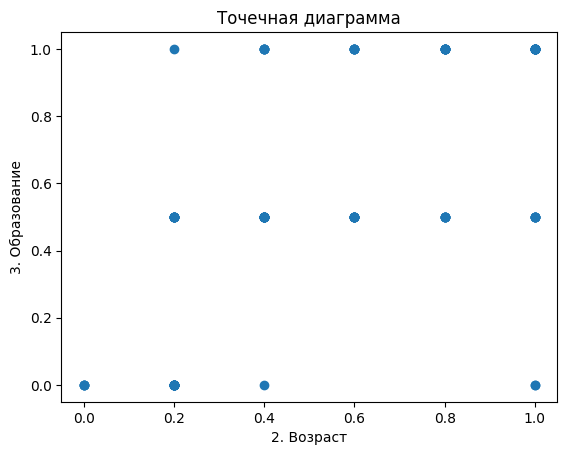

Результат нахождения коэффициента корреляции Пирсона для данных в выбранных столбцах.
Выводятся строки со значимыми значениями коэффициента корреляции     по модулю большими, чем 0.5.


,Первый столбец,Второй столбец,n,t-статистика (t),Табличное критическое значение t-статистики (t крит.),|t| > t крит.,Качественная характеристика,Значимость корреляции,Коэффициент корреляции
0,2. Возраст,3. Образование,106,8.276,1.983,True,***,Значима,0.63


In [136]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'analysis/'
else:
    path = ''

# При значении коэффициента крреляции по модулю меньшим, чем это значение,
# Строка с ответом выводиться не будет. Для показа всех строк приравнять 0:
restrict = 0.5

# Для вывода всех значений корреляции, а не только значимых,
# измените значение аргумента only_meaning на False.

# Для построения точечных диаграмм для всех рассматриваемых пар столбцов,
# измените значение аргумента scatter_diagram_plotting на True.

# Нахождение коэффициента корреляции для нормализованных значений:
result_table_corr = correlation_pearson(
    table=df_data_ns,
    series=column_headers_analysis_corr,
    alpha=0.05,
    only_meaning=True,
    critical=restrict,
    scatter_diagram_plotting=True,
    path_to_save=path
    )

print(f'Результат нахождения коэффициента корреляции Пирсона для данных \
в выбранных столбцах.')
if restrict != 0:
    print(f'Выводятся строки со значимыми значениями коэффициента корреляции \
    по модулю большими, чем {restrict}.')
display(result_table_corr)


### Проверка распределения на соответствие нормальному

Проверка подчинения данных нормальному распределению с помощью критерия Эппса-Палли, описанного в ГОСТ Р ИСО 5479-2002.

Критерий Эппса-Палли применим для выборки объёмом n >= 8, при работе с выборками меньшего объёма с помощью данного критерия невозможно получить достоверные результаты.


Для проверки соответствию нормальному распредлению используется функция epps_pally().

In [137]:
def epps_pally(
        table: pd.DataFrame,
        series: list,
        p_level: float = 0.95,
        path_to_save: str = ''
        ) -> pd.DataFrame:

    """
    Критерий Эппса-Палли для проверки нормалного распределения даннных.

    Аргументы функции:

    table - табл., содержащая столбец с анализируемыми данными,

    series - список названий столбцов c данными,

    p-level - вероятность получить верное значение
    p = alpha - 1, по ум. = 0.95, возм. знач.: 0,9; 0,95; 0,975; 0,99,

    path_to_save - по ум. = '', путь для сохранения файлов.

    Возвращает: pd.DataFrame.
    """

    # ВЫЧИСЛЕНИЕ КРИТЕРИЯ ЭППСА-ПАЛЛИ

    # Создание таблицы, куда будет размещаться ответ:
    column_names_T_EP = [
        'Данные',
        'n',
        'p',
        'Значение критерия (T_EP)',
        'Табличное значение критерия (T_EP крит.)',
        'T_EP < Table',
        'Нормальное распределение'
        ]
    result_T_EP = pd.DataFrame(columns = column_names_T_EP)

    # Таблица для критерия Эппса-Палли:
    # p-квантили статистики критерия Т_EP для
    # р = 1 — аlpha = 0,90; 0,95; 0,975; 0,99
    n_index = [8, 9, 10, 15, 20, 30, 50, 100, 200]
    data = {
        'p=0.9':   [0.271, 0.275, 0.279, 0.284, 0.287,
                    0.289, 0.290, 0.291, 0.290],
        'p=0.95':  [0.347, 0.350, 0.357, 0.366, 0.368,
                    0.371, 0.374, 0.376, 0.379],
        'p=0.975': [0.426, 0.428, 0.437, 0.447, 0.450,
                    0.459, 0.460, 0.464, 0.467],
        'p=0.99':  [0.526, 0.537, 0.545, 0.560, 0.564,
                    0.569, 0.574, 0.583, 0.590]
        }
    T_EP_table = pd.DataFrame(data, index=n_index)
    T_EP_table.index.name = 'n'

    # Выбор величины доверительной вероятности:
    p_level_dict = {
        0.9:   T_EP_table.columns[0],
        0.95:  T_EP_table.columns[1],
        0.975: T_EP_table.columns[2],
        0.99:  T_EP_table.columns[3]
        }

    for s in series:

        # Преобразование данных в массив numpy:
        np_data = table[s].to_numpy()

        # ВЫЧИСЛЕНИЕ ЗНАЧЕНИЯ КРИТЕРИЯ

        # Объём выборки:
        n = len(np_data)

        # Критерий применим для n >= 8:
        if n < 8:
            print(f'Столбец {s} не обработан, так как n < 8 не возможно \
получение достоверных результатов. n = {n}')
            continue

        # Среднее арифметическое:
        mean = np_data.mean()

        # Центральный момент 2-го порядка:
        m_2 = np.var(np_data, ddof = 0)

        A = sqrt(2) * np.sum([exp(-(np_data[i] - mean)**2 / (4*m_2))
        for i in range(n)])
        B = 2/n * np.sum([
            np.sum([
                exp(-(np_data[j] - np_data[k])**2 / (2*m_2)) for j in \
                range(0, k)
                ]) for k in range(1, n)])
        T_EP_empiric = 1 + n / sqrt(3) + B - A

        # НАХОЖДЕНИЕ ТАБЛИЧНОГО ЗНАЧЕНИЯ

        # Линейная интерполяция для нахождения p для
        # различных значений выборки n:
        N_index = T_EP_table.index
        T = T_EP_table[p_level_dict[p_level]]
        f_lin = sci.interpolate.interp1d(N_index, T)
        T_EP_teoretic = float(f_lin(n))

        # СРАВНЕНИЕ ПОЛУЧЕННЫХ ЗНАЧЕНИЙ

        if T_EP_empiric < T_EP_teoretic:
            Conclusion = 'Выполняется'
        else:
            Conclusion = 'Не выполняется'

        # СОЗДАНИЕ ТАБЛИЦЫ С РЕЗУЛЬТАТАМИ

        result = pd.DataFrame({
            'Данные': [s],
            'n': [n],
            'p': [p_level],
            'Значение критерия (T_EP)': [round(T_EP_empiric, 3)],
            'Табличное значение критерия (T_EP крит.)': \
             [round(T_EP_teoretic, 3)],
            'T_EP < Table': [T_EP_empiric < T_EP_teoretic],
            'Нормальное распределение': [Conclusion]
            })

        result_T_EP = pd.concat([result_T_EP, result])

    # Восстановление индексов таблицы:
    result_T_EP = result_T_EP.reset_index(drop=True)

    # СОХРАНЕНИЕ ФАЙЛА ТАБЛИЦЫ С РЕЗУЛЬТАТОМ

    if path_to_save != '':

        # Создание подпапки:
        path_to_save = path_to_save + '/T_EP'

        output_dir = pathlib.Path(path_to_save)

        # Проверка существования папки:
        if not output_dir.exists():

            # Создание папки для таблицы:
            output_dir.mkdir(parents=True, exist_ok=True)

        # Сохранение таблицы с метриками в текущую директорию (папку):
        result_T_EP.to_csv(
            path_to_save + '/result_table_T_EP.csv',
            index=False
            )

    return result_T_EP


Применение критерия Эппса-Палли

In [138]:
# Создание подпапки для сохранения файлов (при необходимости).
if files_storage != '':
    path = files_storage + 'analysis/'
else:
    path = ''

# Вычисление критерия Эппса-Палли для нормализованных значений:
result_table_T_EP = epps_pally(
    table=df_data_ns,
    series=column_headers_analysis_EP,
    p_level=0.95,
    path_to_save=path
    )

print('Результат применения критерия Эппса-Палли для данных \
в выбранных столбцах.\n')
display(result_table_T_EP)


Результат применения критерия Эппса-Палли для данных в выбранных столбцах.



,Данные,n,p,Значение критерия (T_EP),Табличное значение критерия (T_EP крит.),T_EP < Table,Нормальное распределение
0,1. Пол,106,0.95,4.721,0.376,False,Не выполняется
1,2. Возраст,106,0.95,1.203,0.376,False,Не выполняется
2,3. Образование,106,0.95,0.709,0.376,False,Не выполняется
3,4. Наличие брака,106,0.95,4.631,0.376,False,Не выполняется
4,5. Средний доход за месяц,106,0.95,0.182,0.376,True,Выполняется
5,6. Членство в молодёжной организации,106,0.95,6.861,0.376,False,Не выполняется
6,7. Посещение мероприятий культурной направленн...,106,0.95,0.278,0.376,True,Выполняется
7,8. Посещение мероприятий политической направле...,106,0.95,0.551,0.376,False,Не выполняется
8,9. Посещение мероприятий развлекательной напра...,106,0.95,0.256,0.376,True,Выполняется
